### Authors:

## Bishoy George     Bishoy.George.eg@gmail.com
## Farah Mohamad
## Zaynab El Agamy
## Omar Ahmed Shihi
## Toka Abd El Ghafar

## under the respected supervision of TA Ibrahim Gomaa, Data Visualization Lab course
## Dataset 3 a classification problem where the target column named “country_destination”.

### imports

In [ ]:
!pip install dash
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

import xgboost as xgb
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from IPython.display import display, HTML

import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
import joblib

D:\Programs\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\JESUS\AppData\Local\Temp\ipykernel_10392\1135754056.py:21: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\JESUS\AppData\Local\Temp\ipykernel_10392\1135754056.py:22: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### 1. Load the dataset and show the first ten rows

In [2]:
df = pd.read_csv ('Dataset3.csv')
df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/2011,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/2010,2.009060e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/2011,2.009100e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/2010,2.009120e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,1/1/2010,2.010010e+13,1/2/2010,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,1/2/2010,2.010010e+13,1/5/2010,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,1/3/2010,2.010010e+13,1/13/2010,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,1/4/2010,2.010010e+13,7/29/2010,FEMALE,50.0,basic,0,en,NaN,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,1/4/2010,2.010010e+13,1/4/2010,-unknown-,46.0,basic,0,en,NaN,craigslist,omg,Web,Mac Desktop,Firefox,US


### 2. (0)Describe the dataset and show:
#### Before we describe the data set we need to see it's false values and preprosses it a little before moving on with the describing...
#### consider this as describe verision 0....the real describe is version 1 below

In [3]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/2011,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/2010,2.009060e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/2011,2.009100e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/2010,2.009120e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,6/30/2014,2.014060e+13,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,6/30/2014,2.014060e+13,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,6/30/2014,2.014060e+13,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,6/30/2014,2.014060e+13,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
print("Describing the Data:")
df.describe()

Describing the Data:


,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013083e+13,49.668335,3.267387
std,9.253690e+09,155.666612,7.637707
min,2.009030e+13,1.000000,0.000000
25%,2.012120e+13,28.000000,0.000000
50%,2.013090e+13,34.000000,0.000000
75%,2.014030e+13,43.000000,0.000000
max,2.014060e+13,2014.000000,25.000000


In [5]:
print(df.isna().sum())

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                         17
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel              15
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213434 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213436 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [7]:
print("Distribution of Numerical Data:")
for col in df.select_dtypes(include=['float64','int64']):
    print(col)
    print()
    print(df[col].describe())

Distribution of Numerical Data:
timestamp_first_active

count    2.134510e+05
mean     2.013083e+13
std      9.253690e+09
min      2.009030e+13
25%      2.012120e+13
50%      2.013090e+13
75%      2.014030e+13
max      2.014060e+13
Name: timestamp_first_active, dtype: float64
age

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64
signup_flow

count    213451.000000
mean          3.267387
std           7.637707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: signup_flow, dtype: float64


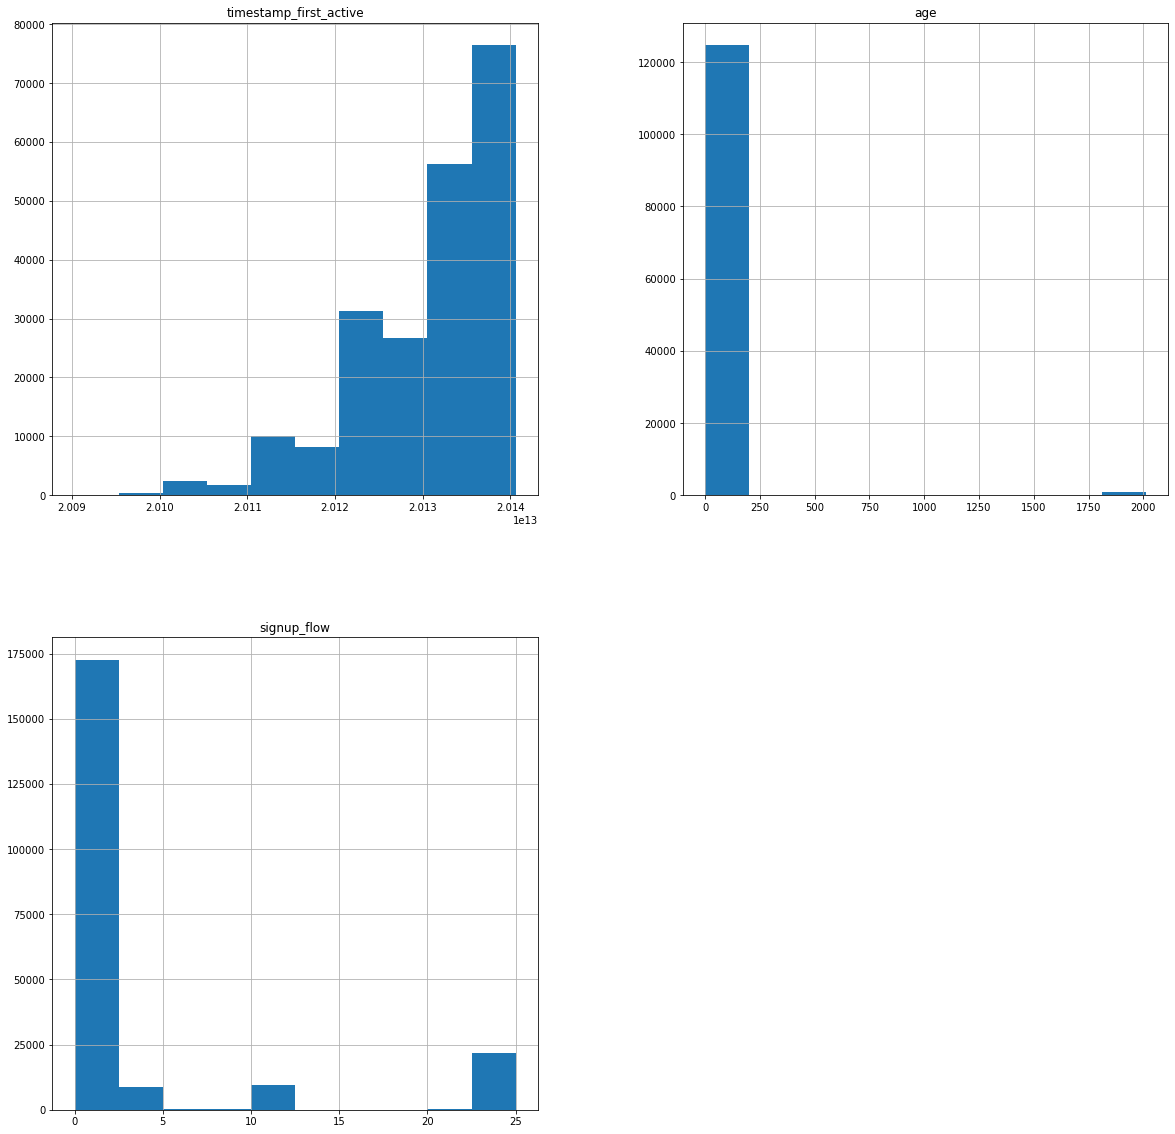

In [8]:
#show the type of distribution of the data
df.hist(figsize=(20,20))
plt.show()

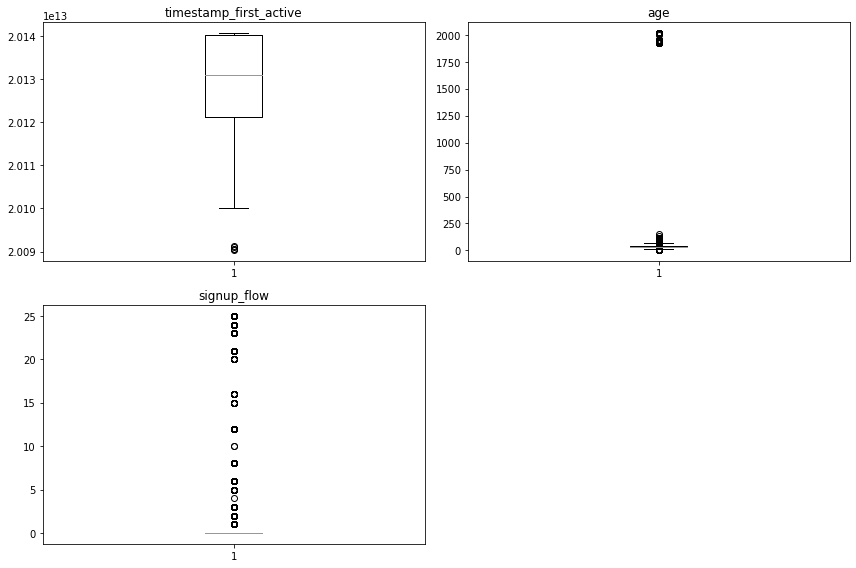

In [9]:
# For Numerical Data:
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
# Create box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[col].dropna())  # Dropping NaN values for plotting
    plt.title(col)
plt.tight_layout()
plt.show()

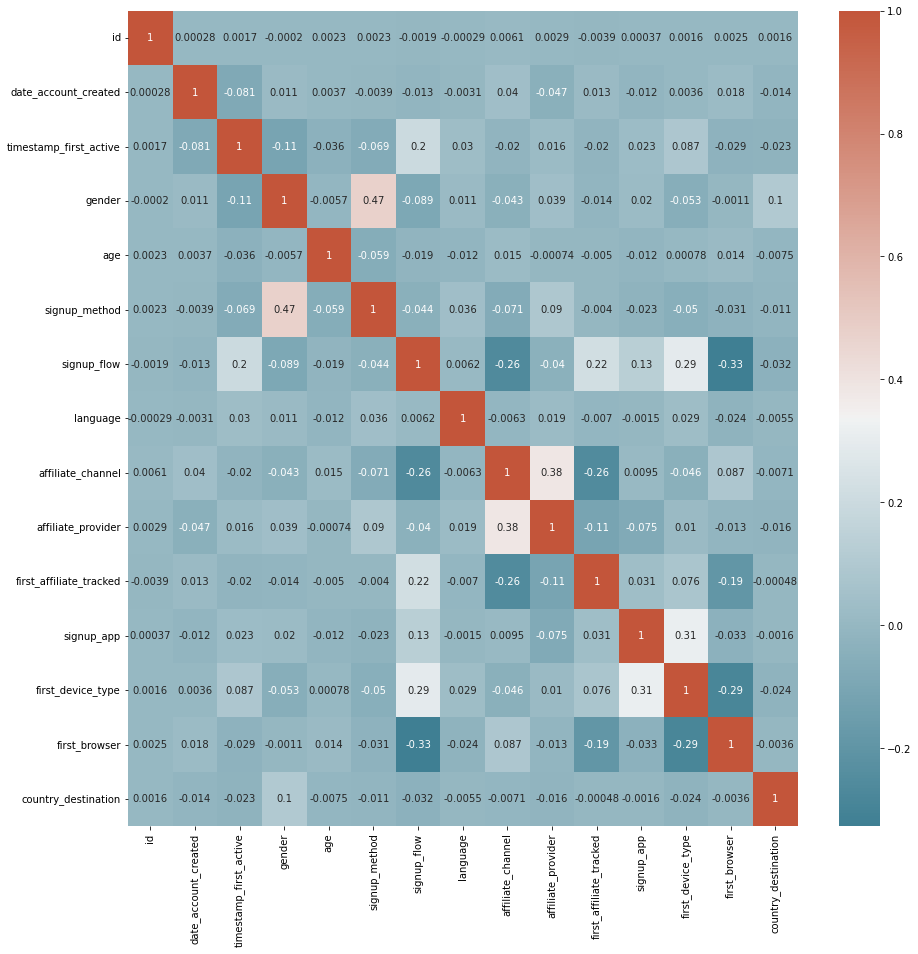

In [10]:
le = LabelEncoder()
df_without_time = df.copy()
df_without_time= df_without_time.drop('date_first_booking', axis=1)

# Apply Label Encoder to each column of the dataframe with object datatype
df_without_time = df_without_time.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# calculate the correlation and plot the heatmap
corr = df_without_time.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

### 2. (1)Describe the dataset and show:

#### small preprossesing to check the data distribution and Describe it better in variable df0

In [11]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/2011,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/2010,2.009060e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/2011,2.009100e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/2010,2.009120e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,6/30/2014,2.014060e+13,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,6/30/2014,2.014060e+13,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,6/30/2014,2.014060e+13,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,6/30/2014,2.014060e+13,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [12]:
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active']) #Correcting the datetime timestamp variable
df['date_account_created'] = pd.to_datetime(df['date_account_created'])     #Correcting the datetime timestamp variable
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])         #Correcting the datetime timestamp variable

In [13]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.300,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.500,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.600,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.000,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.200,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,1970-01-01 05:35:40.600,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,1970-01-01 05:35:40.600,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,1970-01-01 05:35:40.600,NaT,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,1970-01-01 05:35:40.600,NaT,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [14]:
df.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213434 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213436 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [16]:
print(df.isna().sum())

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                         17
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel              15
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


#### start of df0 for better understanding of the data

In [17]:
# Drop date_first_booking column because more than half the values is missing in Variable df0
df0 = df.copy()
df0= df0.drop('date_first_booking', axis=1)

In [18]:
# Drop Gender column, it doesn't have a lot of null values but most of the values are 'unknown'
gender_counts = df0['gender'].value_counts()
print("Count of each value in the 'gender' column: ")
print(gender_counts)

Count of each value in the 'gender' column: 
-unknown-    95678
FEMALE       63035
MALE         54439
OTHER          282
Name: gender, dtype: int64


In [19]:
df0 = df0.drop('gender', axis=1)

In [20]:
# Fill missing values of age column by the age mean
age_mean = df['age'].mean()
df0['age'] = df0['age'].fillna(age_mean)

# Drop affiliate_channel
df0 = df0.dropna(subset=['affiliate_channel'])

In [21]:
# fill first_affiliate_tracked by the most common value which is '
first_affiliate_tracked  = df0['first_affiliate_tracked'].value_counts()
print("Count of each value in the 'first_affiliate_tracked' column: ")
print(first_affiliate_tracked)

Count of each value in the 'first_affiliate_tracked' column: 
untracked        109225
linked            46285
omg               43981
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64


In [22]:
print(df0.isna().sum())

id                            0
date_account_created          0
timestamp_first_active        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    6060
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64


In [23]:
df0['first_affiliate_tracked'] = df0['first_affiliate_tracked'].fillna('untracked')
print(df0.isna().sum())

id                         0
date_account_created       0
timestamp_first_active     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64


In [24]:
print("Describing the Data:")
df0.describe()

Describing the Data:


,age,signup_flow
count,213436.000000,213436.000000
mean,49.668951,3.267617
std,119.348000,7.637926
min,1.000000,0.000000
25%,32.000000,0.000000
50%,49.668335,0.000000
75%,49.668335,0.000000
max,2014.000000,25.000000


In [25]:
print("Data Info:")
df0.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 213436 entries, 0 to 213450
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213436 non-null  object        
 1   date_account_created     213436 non-null  datetime64[ns]
 2   timestamp_first_active   213436 non-null  datetime64[ns]
 3   age                      213436 non-null  float64       
 4   signup_method            213436 non-null  object        
 5   signup_flow              213436 non-null  int64         
 6   language                 213436 non-null  object        
 7   affiliate_channel        213436 non-null  object        
 8   affiliate_provider       213436 non-null  object        
 9   first_affiliate_tracked  213436 non-null  object        
 10  signup_app               213436 non-null  object        
 11  first_device_type        213436 non-null  object        
 12  first

In [26]:
df0

,id,date_account_created,timestamp_first_active,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.300,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.500,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.600,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.000,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.200,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,1970-01-01 05:35:40.600,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,1970-01-01 05:35:40.600,49.668335,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,1970-01-01 05:35:40.600,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,1970-01-01 05:35:40.600,49.668335,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


#### a. The type of distribution of the data.

In [27]:
print("Distribution of Numerical Data:")
for col in df0.select_dtypes(include=['float64','int64','datetime64[ns]']):
    print(col)
    print()
    print(df0[col].describe())

Distribution of Numerical Data:
date_account_created

count                  213436
unique                   1629
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object
timestamp_first_active

count                         213436
unique                            59
top       1970-01-01 05:35:40.600000
freq                           15741
first     1970-01-01 05:34:50.300000
last      1970-01-01 05:35:40.600000
Name: timestamp_first_active, dtype: object
age

count    213436.000000
mean         49.668951
std         119.348000
min           1.000000
25%          32.000000
50%          49.668335
75%          49.668335
max        2014.000000
Name: age, dtype: float64
signup_flow

count    213436.000000
mean          3.267617
std           7.637926
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: signup_flow, dty

C:\Users\JESUS\AppData\Local\Temp\ipykernel_10392\3142203720.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df0[col].describe())
C:\Users\JESUS\AppData\Local\Temp\ipykernel_10392\3142203720.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df0[col].describe())


In [28]:
le = LabelEncoder()
# Apply Label Encoder to each column of the dataframe with object datatype
df0 = df0.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

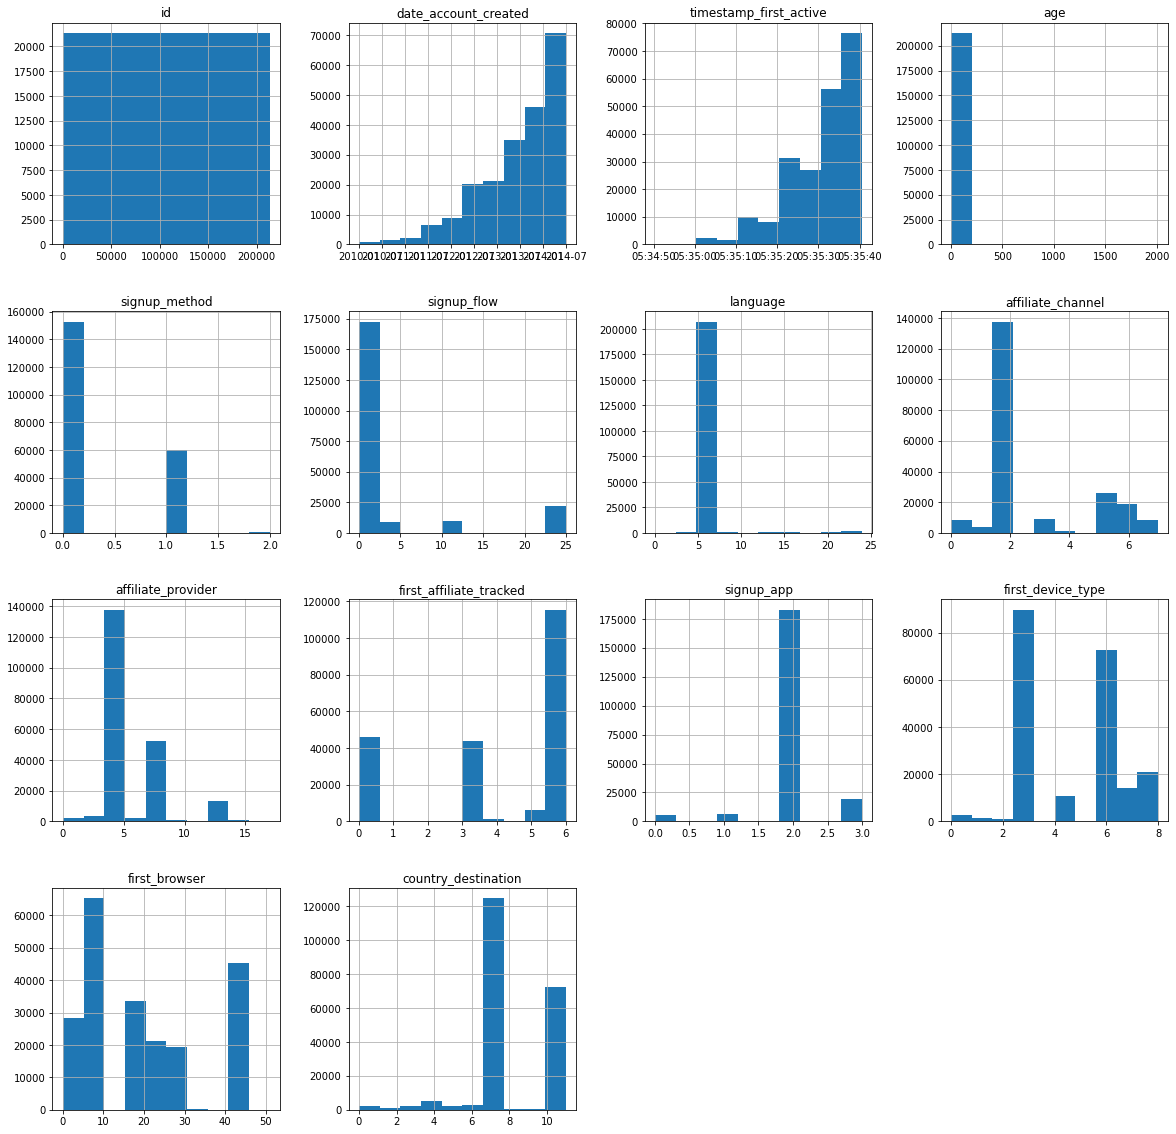

In [29]:
#show the type of distribution of the data
df0.hist(figsize=(20,20))
plt.show()

#### b. If there are any outliers in the data, show them.


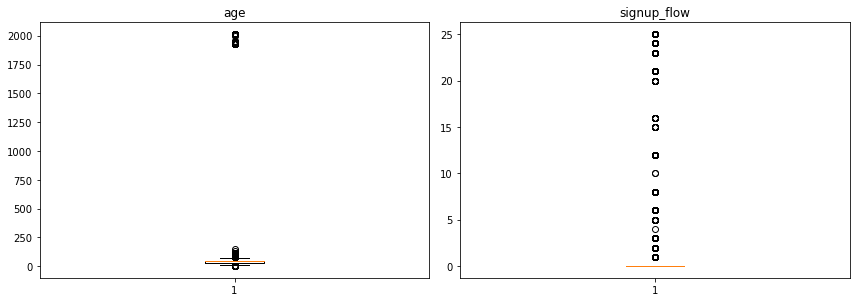

In [30]:
#For Numerical Data:
numerical_cols = df0.select_dtypes(include=['float64','int64']).columns
# Step 3: Create box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df0[col].dropna())  # Dropping NaN values for plotting
    plt.title(col)
plt.tight_layout()
plt.show()

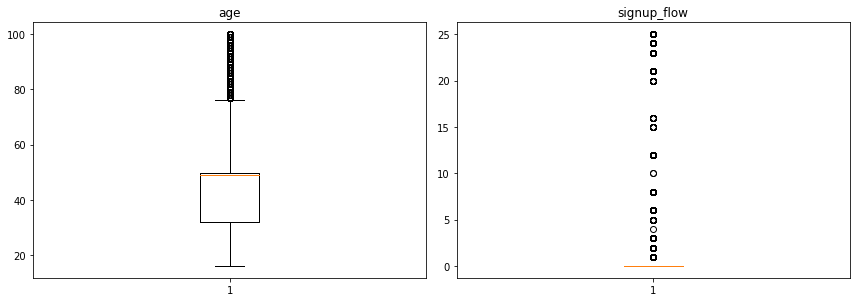

In [31]:
# Filter out ages over 100 and under 16
df0 = df0[df0['age'] <= 100]
df0 = df0[df0['age'] >= 16]

filtered_df = df0[df0['signup_flow'] <= 30]

# For Numerical Data:
numerical_cols = filtered_df.select_dtypes(include=['float64','int64']).columns

# Create box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(filtered_df[col].dropna())  # Dropping NaN values for plotting
    plt.title(col)
plt.tight_layout()
plt.show()


#### c. Show the top three columns containing high variety in the number of categories in case of there are categorical features in the data; or the top three columns with the highest variance in case of all features were numeric.


In [32]:
#For Categorical Data
if df.select_dtypes(include=['object']).shape[1]>0:
  print(df.select_dtypes(include = ['object']).nunique().sort_values(ascending=False)[:4])
else:
    print(df.var().sort_values(ascending=False)[:4])

id                    213451
first_browser             52
language                  25
affiliate_provider        18
dtype: int64


In [33]:
#For Numerical and dates Data
if df.select_dtypes(include=['float64','int64','datetime']).shape[1]>0:
  print(df.select_dtypes(include = ['float64','int64','datetime']).nunique().sort_values(ascending=False)[:4])
else:
    print(df.var().sort_values(ascending=False)[:4])

date_first_booking        1976
date_account_created      1634
age                        127
timestamp_first_active      59
dtype: int64


#### d. If there are any correlations between variables.

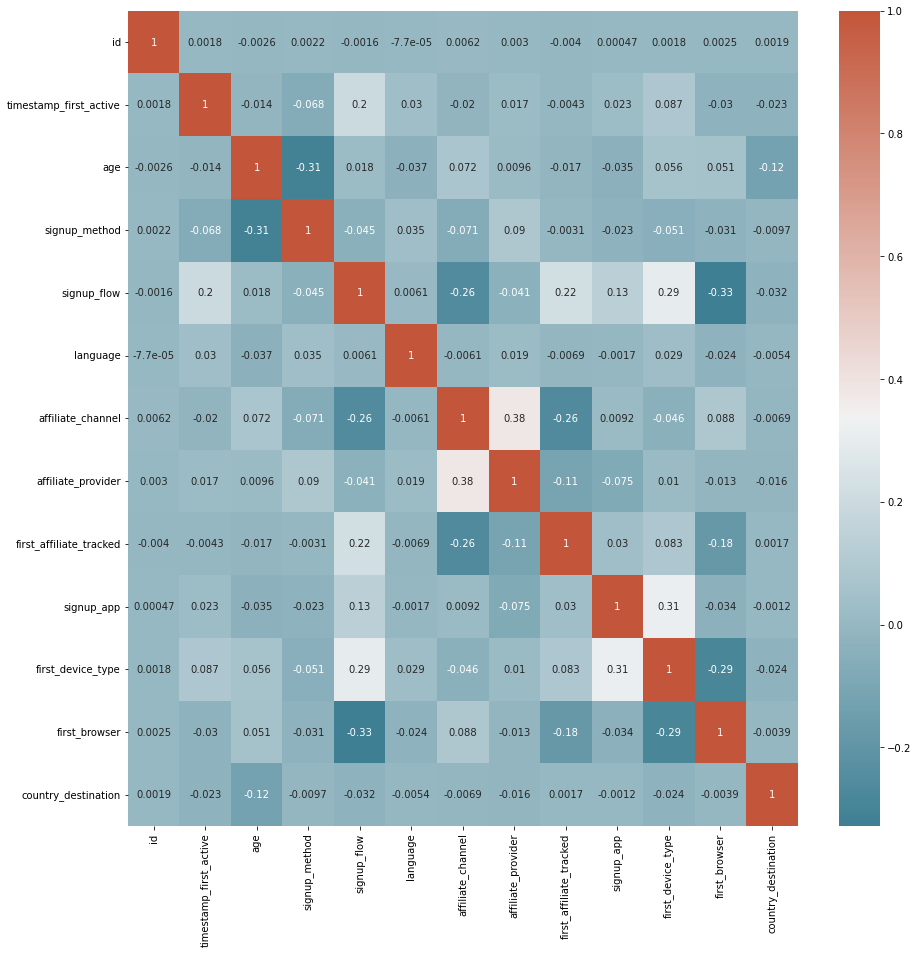

In [34]:
# calculate the correlation and plot the heatmap
df0['timestamp_first_active'] = df0['timestamp_first_active'].astype('int64') // 10**9
corr = df0.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

### 3. Define the most important insights of takeaways from the data?


Booking Patterns:

In [35]:
# Convert date columns to datetime objects for insurence
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])

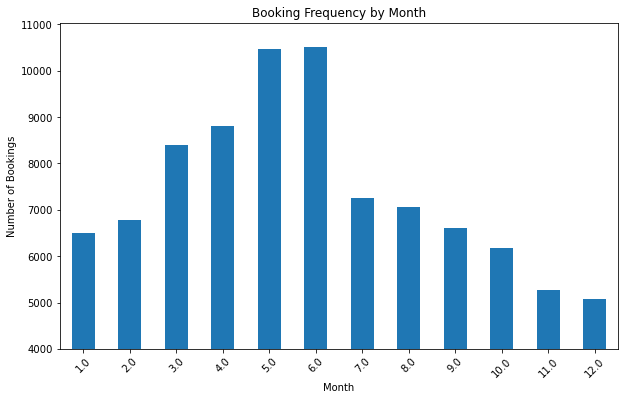

In [36]:
# Visualize booking frequency over time
plt.figure(figsize=(10, 6))
df['date_first_booking'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Booking Frequency by Month')
plt.xticks(rotation=45)
plt.ylim(4000)
plt.show()

#### requency of bookings over different months. Each bar represents the number of bookings made in a specific month, and as seen month 6 has the highest no of bookings 

##### df2 for visualization

In [37]:
# Remove rows with unknown gender
df2 = df.copy()
df2= df2.drop('date_first_booking', axis=1)
df2 = df2[df2['gender'] != '-unknown-']

User Demographics:

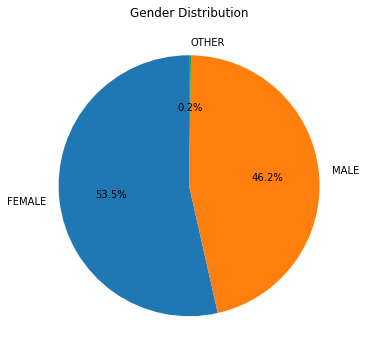

In [38]:
# Explore demographic variables
gender_counts = df2['gender'].value_counts()

# Visualize demographic distributions
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

#### focusing on gender. It counts the occurrences of each gender category in the DataFrame and creates a pie chart to visualize the distribution....the no. of females exceeds no. of males

<Figure size 1008x648 with 0 Axes>

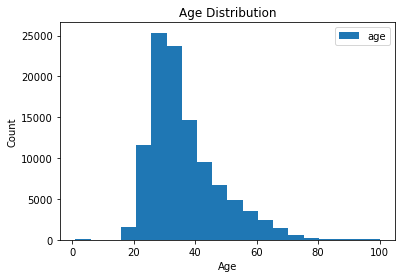

In [39]:
df2= df2.drop('signup_flow', axis=1)
age_distribution = df2['age'].dropna()
age_distribution = df2[df2['age'] <= 100]

plt.figure(figsize=(14, 9))
age_distribution.plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### as for the age most of our people aged between 20 to 60

User Engagement:


In [40]:
# Explore user engagement metrics
signup_methods = df2['signup_method'].value_counts()
affiliate_channels = df2['affiliate_channel'].value_counts()

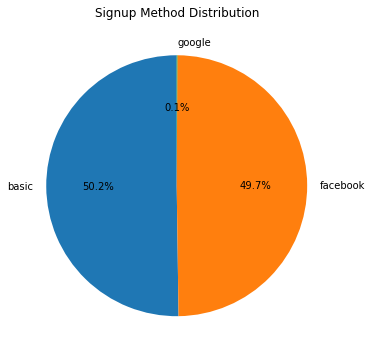

In [41]:
# Visualize engagement metrics as a pie chart
plt.figure(figsize=(10, 6))
signup_methods.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Signup Method Distribution')
plt.ylabel('')
plt.show()

#### The pie chart presents each signup method's proportion relative to the total signups, with percentages displayed on each slice.

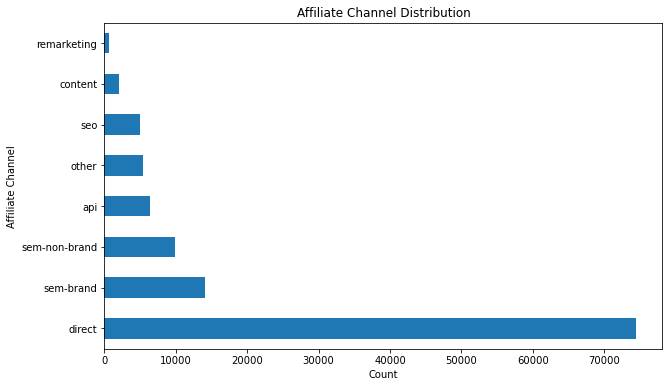

In [42]:
plt.figure(figsize=(10, 6))
affiliate_channels.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Affiliate Channel')
plt.title('Affiliate Channel Distribution')
plt.xticks(rotation=0)
plt.show()

#### generates a horizontal bar chart illustrating the distribution of users across different affiliate channels and as shown most people channel us directly

<Figure size 864x576 with 0 Axes>

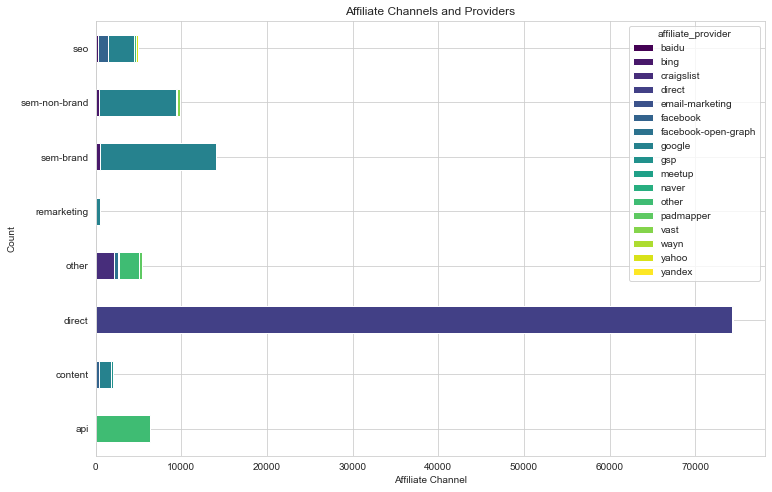

In [82]:
# Affiliate Channels and Providers
plt.figure(figsize=(12, 8))
affiliate_channels_providers = pd.crosstab(df2['affiliate_channel'], df2['affiliate_provider'])
affiliate_channels_providers.plot(kind='barh', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Affiliate Channels and Providers')
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### horizontal bar chart displaying the relationship between affiliate channels and providers. It starts by generating a cross-tabulation of the 'affiliate_channel' and 'affiliate_provider' columns to count occurrences

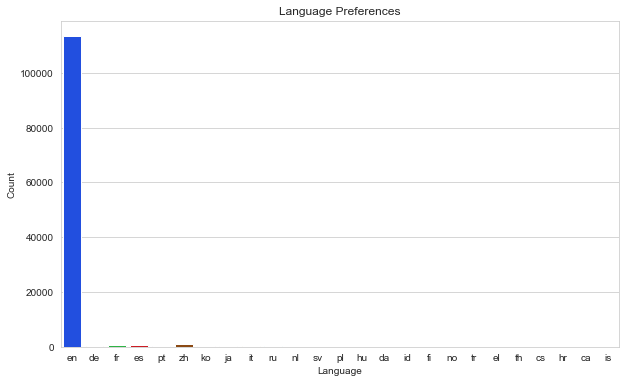

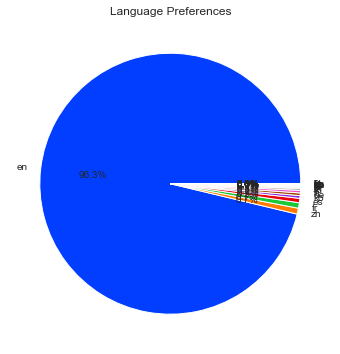

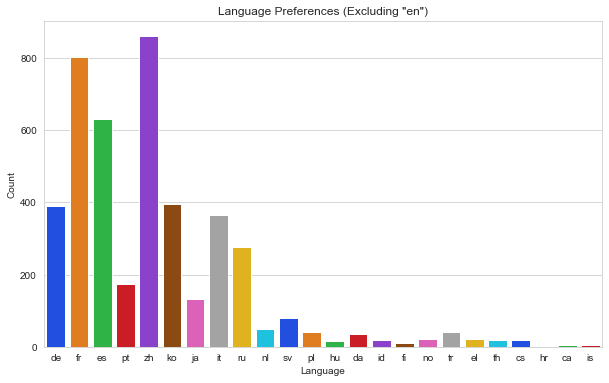

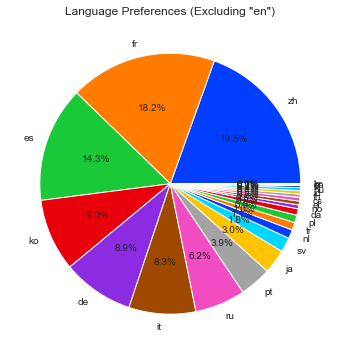

In [44]:
# Language Preferences

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='language', palette='bright')
plt.title('Language Preferences')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

#Language Preferences Pie Chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
language_counts = df2['language'].value_counts()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=sns.color_palette('bright', len(language_counts)))
plt.title('Language Preferences')
plt.show()

df_excl_en = df2[df2['language'] != 'en']

# Language Preferences Bar Chart Excluding 'en'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_excl_en, x='language', palette='bright')
plt.title('Language Preferences (Excluding "en")')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# Language Preferences Pie Chart Excluding 'en'
plt.figure(figsize=(10, 6))
language_counts_excl_en = df_excl_en['language'].value_counts()
plt.pie(language_counts_excl_en, labels=language_counts_excl_en.index, autopct='%1.1f%%', colors=sns.color_palette('bright', len(language_counts_excl_en)))
plt.title('Language Preferences (Excluding "en")')
plt.show()

In [45]:
language_counts = df2['language'].value_counts()
language_counts

en    113369
zh       860
fr       802
es       630
ko       395
de       390
it       365
ru       275
pt       173
ja       132
sv        80
nl        48
tr        42
pl        41
da        35
no        21
el        21
cs        20
id        18
th        18
hu        17
fi        11
ca         4
is         4
hr         2
Name: language, dtype: int64

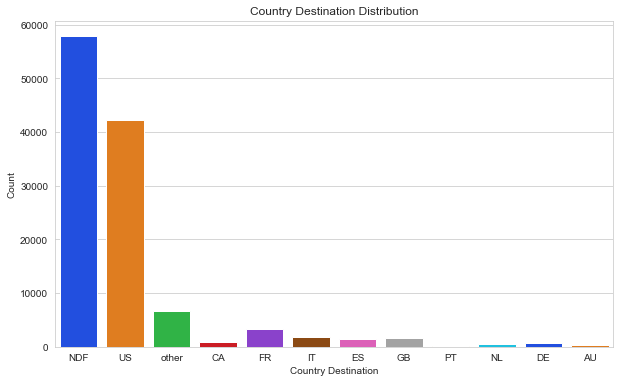

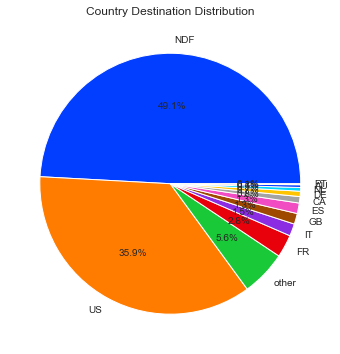

In [46]:
#Country Destination
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='country_destination', palette='bright')
plt.title('Country Destination Distribution')
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.show()

# Count occurrences of each country destination
country_counts = df2['country_destination'].value_counts()
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=sns.color_palette('bright'))
plt.title('Country Destination Distribution')
plt.show()

## Based on this Data...we need to sample more to overcome overfitting (Data science Insights)
## the data is unbalanced so we have to decide what to do with it 
## Over Sampling IS A MUST   FOR CLASSIFICATION

#### as shown the most spoken language our user use is eng, but we there are very few that uses other language as shown

In [47]:
# Device Type and Browser Usage
# another visualization but not important....
'''
plt.figure(figsize=(12, 8))
device_browser = pd.crosstab(df2['first_device_type'], df2['first_browser'])
device_browser.plot(kind='bar', stacked=True, colormap='viridis', figsize=(22, 15))
plt.title('Device Type and Browser Usage')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()
'''

"\nplt.figure(figsize=(12, 8))\ndevice_browser = pd.crosstab(df2['first_device_type'], df2['first_browser'])\ndevice_browser.plot(kind='bar', stacked=True, colormap='viridis', figsize=(22, 15))\nplt.title('Device Type and Browser Usage')\nplt.xlabel('Device Type')\nplt.ylabel('Count')\nplt.show()\n"

### 4. Create an interactive dashboard for the project:
#### a. It should contain at least two charts.
#### b. The dashboard should include a drop-down list or radio button that allows the user to select different values. Based on the selected value, the shape of the charts should change.


In [48]:
# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='chart-dropdown',
        options=[
            {'label': 'Gender Distribution', 'value': 'gender'},
            {'label': 'Affiliate Channel Distribution', 'value': 'affiliate_channel'},
            {'label': 'Booking Frequency by Month', 'value': 'booking_frequency'},
            {'label': 'Age Distribution', 'value': 'age_distribution'},
            {'label': 'Signup Method Distribution', 'value': 'user_engagement'},
            {'label': 'Language Preferences', 'value': 'language_preferences'},
            {'label': 'Country Destination Distribution', 'value': 'country_destination'}
        ],
        value='gender'
    ),
    html.Div(id='dashboard-container')
])
# Define callback to update dashboard based on dropdown value
@app.callback(
    Output('dashboard-container', 'children'),
    [Input('chart-dropdown', 'value')]
)
def update_dashboard(selected_chart):
    if selected_chart == 'gender':
        # Chart 1: Gender Distribution (Pie Chart)
        gender_counts = df2['gender'].value_counts()
        fig = px.pie(names=gender_counts.index, values=gender_counts.values, title='Gender Distribution')
    elif selected_chart == 'affiliate_channel':
        # Chart 2: Affiliate Channel Distribution (Bar Chart)
        affiliate_channel_counts = df2['affiliate_channel'].value_counts()
        fig = px.bar(x=affiliate_channel_counts.index, y=affiliate_channel_counts.values,
                     labels={'x': 'Affiliate Channel', 'y': 'Count'},
                     title='Affiliate Channel Distribution')
    elif selected_chart == 'booking_frequency':
        # Calculate booking frequency by month
        booking_freq = df['date_first_booking'].dt.month.value_counts().sort_index()
        fig = go.Figure(data=[go.Bar(x=booking_freq.index, y=booking_freq.values)])
        fig.update_layout(title='Booking Frequency by Month', xaxis_title='Month', yaxis_title='Number of Bookings')
    elif selected_chart == 'age_distribution':
        # Calculate age distribution
        age_distribution = df2['age'].dropna()
        age_distribution = age_distribution[age_distribution <= 100]
        fig = ff.create_distplot([age_distribution.tolist()], ['Age'], bin_size=20)
        fig.update_layout(title='Age Distribution', xaxis_title='Age', yaxis_title='Count')
    elif selected_chart == 'user_engagement':
        # Create a pie chart for signup methods
        fig = go.Figure(data=[go.Pie(labels=signup_methods.index, values=signup_methods.values)])
        fig.update_layout(title='Signup Method Distribution')
    elif selected_chart == 'language_preferences':
        # Create a pie chart for language preferences (counts)
        fig = go.Figure(data=[go.Pie(labels=language_counts.index, values=language_counts.values, hole=0.3)])
        fig.update_layout(title='Language Preferences')
        
    elif selected_chart == 'country_destination':
        # Create a count plot for country destination
        fig = go.Figure(data=[go.Bar(x=country_counts.index, y=country_counts.values)])
        fig.update_layout(title='Country Destination Distribution', xaxis_title='Country Destination', yaxis_title='Count')
    else:
        # Default fallback option
        fig = go.Figure()
        
    return dcc.Graph(figure=fig)


    # Run the app
if __name__ == '__main__': 
    app.run_server(debug=True)
    app.run_server(port=8050, mode='inline')

# Generate link to visit the dashboard
dashboard_link = f'http://localhost:8050'
display(HTML(f'<a href="{dashboard_link}" target="_blank">Click here to view the dashboard</a>'))

### 5. According to your dataset, list at least 4 preprocessing steps that should be performed


#### 1) Missing values Imputation & Removing ouliers
#### 2) Encoding
#### 3) Data Splitting
#### 4) Feature Selection(reduction)



### 6. For each listed preprocessing step, determine the different approaches you will adapt according to dataset characteristics
### 7. Implement the listed preprocessing steps using the appropriate approach.


### 1)Missing values Imputation (some cleaning & preprossesing too)

In [49]:
df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                         17
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel              15
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

#### df1 created

In [50]:
# Drop date_first_booking column because more than half the values is missing
df1 = df.copy()
df1= df1.drop('date_first_booking', axis=1)

In [51]:
gender_counts = df1['gender'].value_counts()
print("Count of each value in the 'gender' column: ")
gender_counts

Count of each value in the 'gender' column: 


-unknown-    95678
FEMALE       63035
MALE         54439
OTHER          282
Name: gender, dtype: int64

In [52]:
# Drop Gender column, it doesn't have a lot of null values but most of the values are 'unknown'
df1 = df1.drop('gender', axis=1)

In [53]:
# Fill missing values of age column by the age mean
age_mean = df['age'].mean()
df1['age'] = df1['age'].fillna(age_mean)

In [54]:
# Drop rows with missing values in the 'affiliate_channel' column
df1 = df1.dropna(subset=['affiliate_channel'])

# fill first_affiliate_tracked by the most common value which is 'untracked'
first_affiliate_tracked  = df1['first_affiliate_tracked'].value_counts()
print("Count of each value in the 'first_affiliate_tracked' column: ")
first_affiliate_tracked

Count of each value in the 'first_affiliate_tracked' column: 


untracked        109225
linked            46285
omg               43981
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [55]:
df1['first_affiliate_tracked'] = df1['first_affiliate_tracked'].fillna('untracked')
df1.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213436 entries, 0 to 213450
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213436 non-null  object        
 1   date_account_created     213436 non-null  datetime64[ns]
 2   timestamp_first_active   213436 non-null  datetime64[ns]
 3   age                      213436 non-null  float64       
 4   signup_method            213436 non-null  object        
 5   signup_flow              213436 non-null  int64         
 6   language                 213436 non-null  object        
 7   affiliate_channel        213436 non-null  object        
 8   affiliate_provider       213436 non-null  object        
 9   first_affiliate_tracked  213436 non-null  object        
 10  signup_app               213436 non-null  object        
 11  first_device_type        213436 non-null  object        
 12  first_browser   

In [57]:
# Droping ID because it is an identifier and doesn't carry any meaningful information for modeling purpose
df1 = df1.drop('id', axis=1)

In [58]:
#remove some of the outliers detected before:
# Filter out ages over 90 and under 16
df1 = df1[df1['age'] <= 90]
df1 = df1[df1['age'] >= 16]

In [59]:
df1.drop(['date_account_created', 'timestamp_first_active'], axis=1, inplace=True)

In [60]:
df1['age'] = df1['age'].round().astype(int)
df1

,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,50,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...
213446,32,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,50,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,32,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,50,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


### 2)Enconding

In [61]:
# Categorical Features are nominal so we will use Frequency Encoding
categorical_features = df1.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('country_destination')
print("Categorical Features: ")
print(categorical_features)

Categorical Features: 
['signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']


In [62]:
df1_numerical_features = df1.drop(categorical_features, axis=1)

# Apply frequency encoding to each categorical feature
for feature in categorical_features:
    # Get the frequency of each category in the feature
    freq = df1[feature].value_counts()
    # Map the frequencies to the feature in the DataFrame
    df1[feature] = df1[feature].map(freq)

df1 = pd.concat([df1_numerical_features, df1[categorical_features], df1['country_destination']], axis=1)
df1

,age,signup_flow,country_destination,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,50,0,NDF,59311,203752,136088,135792,113948,180295,88379,63090,NDF
1,38,0,NDF,59311,203752,8542,51002,113948,180295,88379,63090,NDF
2,56,3,US,150972,203752,136088,135792,113948,180295,71799,20770,US
3,42,0,other,59311,203752,136088,135792,113948,180295,88379,33204,other
4,41,0,US,150972,203752,136088,135792,113948,180295,88379,63090,US
...,...,...,...,...,...,...,...,...,...,...,...,...
213446,32,0,NDF,150972,203752,25695,51002,43466,180295,88379,44518,NDF
213447,50,0,NDF,150972,203752,136088,135792,45664,180295,71799,63090,NDF
213448,32,0,NDF,150972,203752,136088,135792,113948,180295,88379,33204,NDF
213449,50,25,NDF,150972,203752,8802,12414,6046,18914,20610,19056,NDF


###### we don't have enough hardware to use one hot encoding...It gives a lot of coloumns due to the presence of large no. of unique values in each feature 

In [63]:
# Drop duplicate columns
df1 = df1.loc[:,~df1.columns.duplicated()]

In [64]:
df1

,age,signup_flow,country_destination,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,50,0,NDF,59311,203752,136088,135792,113948,180295,88379,63090
1,38,0,NDF,59311,203752,8542,51002,113948,180295,88379,63090
2,56,3,US,150972,203752,136088,135792,113948,180295,71799,20770
3,42,0,other,59311,203752,136088,135792,113948,180295,88379,33204
4,41,0,US,150972,203752,136088,135792,113948,180295,88379,63090
...,...,...,...,...,...,...,...,...,...,...,...
213446,32,0,NDF,150972,203752,25695,51002,43466,180295,88379,44518
213447,50,0,NDF,150972,203752,136088,135792,45664,180295,71799,63090
213448,32,0,NDF,150972,203752,136088,135792,113948,180295,88379,33204
213449,50,25,NDF,150972,203752,8802,12414,6046,18914,20610,19056


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210828 entries, 0 to 213450
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   age                      210828 non-null  int32 
 1   signup_flow              210828 non-null  int64 
 2   country_destination      210828 non-null  object
 3   signup_method            210828 non-null  int64 
 4   language                 210828 non-null  int64 
 5   affiliate_channel        210828 non-null  int64 
 6   affiliate_provider       210828 non-null  int64 
 7   first_affiliate_tracked  210828 non-null  int64 
 8   signup_app               210828 non-null  int64 
 9   first_device_type        210828 non-null  int64 
 10  first_browser            210828 non-null  int64 
dtypes: int32(1), int64(9), object(1)
memory usage: 18.5+ MB


In [66]:
df1.describe(include = 'object')

,country_destination
count,210828
unique,12
top,NDF
freq,123316


### 3)Data Splitting

In [67]:
y = df1['country_destination']
X = df1.drop(['country_destination'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.2)

### 4)Feature Selection(reduction)

In [68]:
#Check data types
print("Data types of features:")
print(X_train.dtypes)
print("\nData type of labels:")
print(y_train.dtype)

Data types of features:
age                        int32
signup_flow                int64
signup_method              int64
language                   int64
affiliate_channel          int64
affiliate_provider         int64
first_affiliate_tracked    int64
signup_app                 int64
first_device_type          int64
first_browser              int64
dtype: object

Data type of labels:
object


#### we used for feature selection the Recursive Feature Elimination (RFE)


In [69]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define your estimator (classifier) for RFE
estimator = RandomForestClassifier(random_state=100)

# Initialize RFE and specify the number of desired features to retain
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Filter the training data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)


In [70]:
selected_features

Index(['age', 'signup_flow', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')

## 8. After applying preprocessing steps, build a regression machine learning model according to your dataset and the type of the problem.

## Model 1 random Forest Classifier

In [71]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)

# Fit the model
rf_model.fit(X_train_selected, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classification Report:\n", report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

          AU       0.08      0.01      0.02       119
          CA       0.00      0.00      0.00       275
          DE       0.00      0.00      0.00       227
          ES       0.00      0.00      0.00       442
          FR       0.04      0.01      0.01       991
          GB       0.00      0.00      0.00       422
          IT       0.03      0.01      0.01       518
         NDF       0.68      0.82      0.74     24741
          NL       0.04      0.01      0.01       152
          PT       0.00      0.00      0.00        32
          US       0.46      0.43      0.44     12275
       other       0.09      0.01      0.02      1972

    accuracy                           0.61     42166
   macro avg       0.12      0.11      0.11     42166
weighted avg       0.54      0.61      0.57     42166



### 9. Evaluate the model with the appropriate measure and save it as a .pkl file


In [72]:
# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("-----------------------------------------------")

# Save the model as a .pkl file
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")

Random Forest Accuracy: 0.6084523075463644
-----------------------------------------------
Model saved as random_forest_model.pkl


### 10. Write a function to be called for predicting new coming rows.

In [73]:
def predict_with_random_forest(new_data,y_train):
    # Fit the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
    rf_model.fit(new_data, y_train)
    # Load the trained model
    rf_model = joblib.load('random_forest_model.pkl')

    # Predict using the trained model
    predictions = rf_model.predict(new_data)

    return predictions

new_predictions = predict_with_random_forest(X_train_selected, y_train)
print(new_predictions)

['NDF' 'US' 'NDF' ... 'US' 'NDF' 'US']


## Model 2  XGBoost 

In [74]:
#in order for the xgb to run y_train has to be int not object, so label encoder:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
classes = label_encoder.classes_
print("Encoded classes:", classes)

Encoded classes: ['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NDF' 'NL' 'PT' 'US' 'other']


In [75]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(classes), random_state=100)
xgb_model.fit(X_train_selected, y_train_encoded)
y_pred_xgb_encoded = xgb_model.predict(X_test_selected)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# Print results
print("XGBoost Classification Report:\n", report_xgb)
print("XGBoost Accuracy:", accuracy_xgb)


C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBoost Classification Report:
               precision    recall  f1-score   support

          AU       0.00      0.00      0.00       119
          CA       0.00      0.00      0.00       275
          DE       0.00      0.00      0.00       227
          ES       0.00      0.00      0.00       442
          FR       0.00      0.00      0.00       991
          GB       0.00      0.00      0.00       422
          IT       0.00      0.00      0.00       518
         NDF       0.69      0.84      0.76     24741
          NL       0.00      0.00      0.00       152
          PT       0.00      0.00      0.00        32
          US       0.49      0.48      0.49     12275
       other       0.20      0.00      0.00      1972

    accuracy                           0.63     42166
   macro avg       0.12      0.11      0.10     42166
weighted avg       0.56      0.63      0.59     42166

XGBoost Accuracy: 0.634349950196841


C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### 9. Evaluate the model with the appropriate measure and save it as a .pkl file

In [76]:
print("XGBoost Accuracy:", accuracy_xgb)
print("-----------------------------------------------")

joblib.dump(xgb_model, 'xgboost_model.pkl')
print("XGBoost Model saved as xgboost_model.pkl")

XGBoost Accuracy: 0.634349950196841
-----------------------------------------------
XGBoost Model saved as xgboost_model.pkl


### 10. Write a function to be called for predicting new coming rows.

In [77]:
def predict_with_xgboost(new_data, y_train):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit LabelEncoder on y_train and transform y_train
    y_train_encoded = label_encoder.fit_transform(y_train)

    # Initialize XGBoost Classifier
    xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=100)

    # Fit the model
    xgb_model.fit(new_data, y_train_encoded)

    # Predict using the trained model
    predictions_encoded = xgb_model.predict(new_data)

    # Convert the predicted labels back to original class labels
    predictions = label_encoder.inverse_transform(predictions_encoded)

    return predictions

new_predictions_xgb = predict_with_xgboost(X_train_selected, y_train)
print(new_predictions_xgb)


['NDF' 'US' 'NDF' ... 'US' 'NDF' 'NDF']


In [ ]:
new_predictions_xgb

## another Models

In [78]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=100)
adaboost_model.fit(X_train_selected, y_train)
y_pred_adaboost = adaboost_model.predict(X_test_selected)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
report_adaboost = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classification Report:\n", report_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)

C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AdaBoost Classification Report:
               precision    recall  f1-score   support

          AU       0.00      0.00      0.00       119
          CA       0.00      0.00      0.00       275
          DE       0.00      0.00      0.00       227
          ES       0.00      0.00      0.00       442
          FR       0.00      0.00      0.00       991
          GB       0.00      0.00      0.00       422
          IT       0.00      0.00      0.00       518
         NDF       0.67      0.86      0.76     24741
          NL       0.00      0.00      0.00       152
          PT       0.00      0.00      0.00        32
          US       0.49      0.42      0.45     12275
       other       0.00      0.00      0.00      1972

    accuracy                           0.63     42166
   macro avg       0.10      0.11      0.10     42166
weighted avg       0.54      0.63      0.57     42166

AdaBoost Accuracy: 0.6268557605653844


C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Normalizing the Data for the SVM and NN

In [79]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_selected)


In [80]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=100)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)
print("Neural Network Classification Report:\n", report_nn)
print("Neural Network Accuracy:", accuracy_nn)


C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Neural Network Classification Report:
               precision    recall  f1-score   support

          AU       0.00      0.00      0.00       119
          CA       0.00      0.00      0.00       275
          DE       0.00      0.00      0.00       227
          ES       0.00      0.00      0.00       442
          FR       0.00      0.00      0.00       991
          GB       0.00      0.00      0.00       422
          IT       0.00      0.00      0.00       518
         NDF       0.68      0.85      0.76     24741
          NL       0.00      0.00      0.00       152
          PT       0.00      0.00      0.00        32
          US       0.49      0.45      0.47     12275
       other       0.00      0.00      0.00      1972

    accuracy                           0.63     42166
   macro avg       0.10      0.11      0.10     42166
weighted avg       0.54      0.63      0.58     42166

Neural Network Accuracy: 0.6300573922117346


C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\JESUS\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#you can also run SVM but take care it will take forever.....it will give a 62% accuracy 

'''
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=100)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)
print("SVM Accuracy:", accuracy_svm)
'''


### Bonus

### • Develop web application with two main functionalities (train, predict)
### • In python develop flask api. One for train and one for test
### • If you choose train from web application, train api will be called to apply the ML pipeline and save the model as pkl
### • In case you select predict from web application, predict api will be called to predict the new given rows.

In [83]:
#To save the training data in csv for the website to train

# Assuming X_train_selected and y_train are already defined
# Convert X_train_selected to a DataFrame
Testing_Data = pd.DataFrame(X_test_selected)
X_train_selected_df = pd.DataFrame(X_train_selected)

# Concatenate X_train_selected_df and y_train
train_data_with_target = pd.concat([X_train_selected_df, pd.DataFrame(y_train, columns=['country_destination'])], axis=1)
train_data_with_target = train_data_with_target.dropna(how='any',axis=0)

# Save the concatenated DataFrame to a CSV file
train_data_with_target.to_csv('Training.csv', index=False)
train_data_with_target.to_csv('Testing.csv', index=False)